### Importing Libraries

In [ ]:
import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as pt

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [ ]:
(x_train, y_train), (x_test, y_test) = t.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Normalizing Data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
# For normalization image pixel values are divided by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale
 
# To understand the structer of dataset
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


Visualizing Data

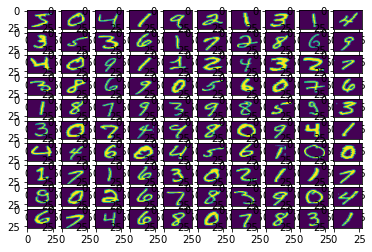

In [ ]:
fig, ax = pt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
pt.show()

Making Layers

In [ ]:
model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),
    
    # layer 1
    Dense(256, activation='sigmoid'),  
    
    # layer 2
    Dense(128, activation='sigmoid'), 
    
    # layer
    Dense(10, activation='sigmoid'),  
])

Coompile The Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fitting The Model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 2s 64ms/step - loss: 2.1078 - accuracy: 0.3800 - val_loss: 1.7642 - val_accuracy: 0.5913
Epoch 2/10
24/24 [==============================] - 1s 53ms/step - loss: 1.4328 - accuracy: 0.7372 - val_loss: 1.0718 - val_accuracy: 0.8139
Epoch 3/10
24/24 [==============================] - 1s 53ms/step - loss: 0.8951 - accuracy: 0.8253 - val_loss: 0.6974 - val_accuracy: 0.8651
Epoch 4/10
24/24 [==============================] - 1s 53ms/step - loss: 0.6283 - accuracy: 0.8650 - val_loss: 0.5174 - val_accuracy: 0.8852
Epoch 5/10
24/24 [==============================] - 1s 54ms/step - loss: 0.4921 - accuracy: 0.8847 - val_loss: 0.4217 - val_accuracy: 0.8988
Epoch 6/10
24/24 [==============================] - 1s 53ms/step - loss: 0.4156 - accuracy: 0.8964 - val_loss: 0.3661 - val_accuracy: 0.9066
Epoch 7/10
24/24 [==============================] - 1s 53ms/step - loss: 0.3679 - accuracy: 0.9039 - val_loss: 0.3306 - val_accuracy: 0.9140
Epoch 8/10
24

Accuracy Of The Model

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.27741625905036926, 0.9225999712944031]


# Gradient Decent

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

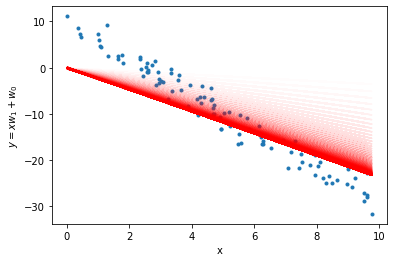

In [ ]:
N = 100
x = np.random.rand(N) * 10
y = -4*x + 10 + 2*np.random.randn(N)
optimizer = GradientDescent(learning_rate=.005, max_iters=100, record_history=True)
model = LinearRegression()
model.fit(x,y, optimizer)
plt.plot(x, y, '.')
for t,w in enumerate(optimizer.w_history):
    plt.plot(x, x*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
plt.xlabel('x')
plt.ylabel(r'$y=xw_1 + w_0$')
#plt.xlim(-20,20)
#plt.ylim(-100,100)
plt.show()

In [ ]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

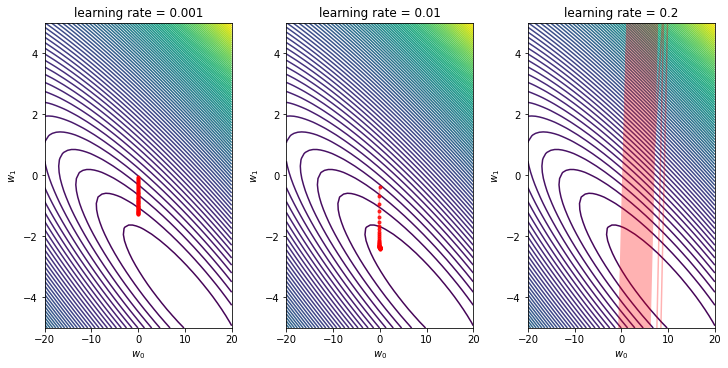

In [ ]:
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
learning_rates = [.001, .01, .2]
fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 5))
for i, lr in enumerate(learning_rates):
    optimizer = GradientDescent(learning_rate=lr, max_iters=50, record_history=True)
    model = LinearRegression()
    model.fit(x,y, optimizer)
    plot_contour(cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)                  # get the history for plotting
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'learning rate = {lr}')
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()